## Dummy Variables

Prepare the dataset by performing the preprocessing techniques, to have the all the features in numeric format

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
sns.set()

In [3]:
animaldf = pd.read_csv('animal_category.csv')

### Exploratory Data Analysis

In [4]:
animaldf.sample(5)

,Index,Animals,Gender,Homly,Types
6,7,Lion,Female,Yes,D
29,30,Lion,Female,No,D
8,9,Cat,Female,Yes,A
3,4,Mouse,Male,Yes,C
25,26,Lion,Female,No,D


In [5]:
animaldf.shape

(30, 5)

In [6]:
animaldf.dtypes

Index       int64
Animals    object
Gender     object
Homly      object
Types      object
dtype: object

In [7]:
animaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    30 non-null     int64 
 1   Animals  30 non-null     object
 2   Gender   30 non-null     object
 3   Homly    30 non-null     object
 4   Types    30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


Animals , Gender   ,Homly    and Types     are nominal features. We will apply onehot encoding to these features.

In [8]:
animaldf.isnull().sum().sum()

0

In [9]:
animaldf.duplicated().sum()

0

In [10]:
animaldf.Animals.value_counts()

Lion     12
Cat       6
Dog       5
Goat      5
Mouse     2
Name: Animals, dtype: int64

<AxesSubplot:xlabel='Animals', ylabel='count'>

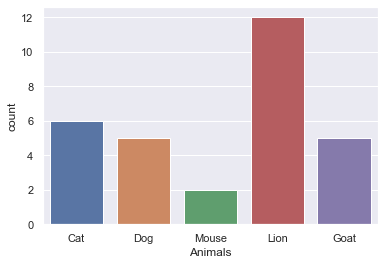

In [11]:
sns.countplot(x='Animals', data=animaldf)

In [12]:
animaldf.Gender.value_counts()

Male      15
Female    15
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

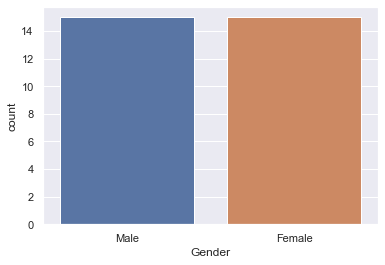

In [13]:
sns.countplot(x='Gender', data=animaldf)

In [14]:
animaldf.Homly.value_counts()

Yes    15
No     15
Name: Homly, dtype: int64

<AxesSubplot:xlabel='Homly', ylabel='count'>

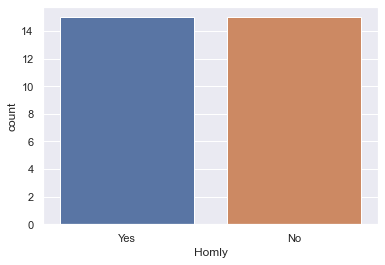

In [15]:
sns.countplot(x='Homly', data=animaldf)

In [16]:
animaldf.Types.value_counts()

D    12
A     6
B     5
E     5
C     2
Name: Types, dtype: int64

<AxesSubplot:xlabel='Types', ylabel='count'>

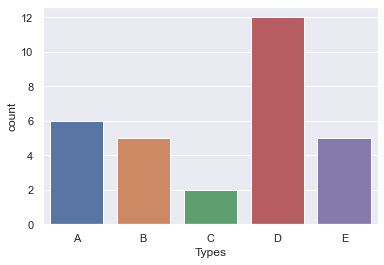

In [17]:
sns.countplot(x='Types', data=animaldf)

Animals , Gender   ,Homly    and Types     are nominal features. We will apply onehot encoding to these features.

In [18]:
animaldf.columns

Index(['Index', 'Animals', 'Gender', 'Homly', 'Types'], dtype='object')

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

#nominal_features = ['Animals', 'Gender', 'Homly', 'Types']


preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first'), slice(1,5))],remainder='passthrough')


### Create Preprocessing Pipeline

In [20]:
# We will later Append classifier to preprocessing pipeline.
pipe = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

In [21]:
# Apply the tranformation
animaldf_transformed = pipe.fit_transform(animaldf) 

In [22]:
animaldf_transformed.shape

(30, 11)

In [23]:
animaldf_transformed[6,:]

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 7.])

In [24]:
animaldf_transformed_df = pd.DataFrame(animaldf_transformed)

In [25]:
animaldf_transformed_df.shape

(30, 11)

In [26]:
animaldf_transformed_df.columns = ['Animals1','Animals2','Animals3','Animals4' ,'Gender', 
                                   'Homly', 'Types1','Types2','Types3','Types4','Index']

In [27]:
animaldf_transformed_df

,Animals1,Animals2,Animals3,Animals4,Gender,Homly,Types1,Types2,Types3,Types4,Index
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0
9,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,10.0
